#  CODSOFT

TASK -2
IRIS FLOWER CLASSIFICATION


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
data=pd.read_csv(r"F:\iris(1)_kaggle\IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


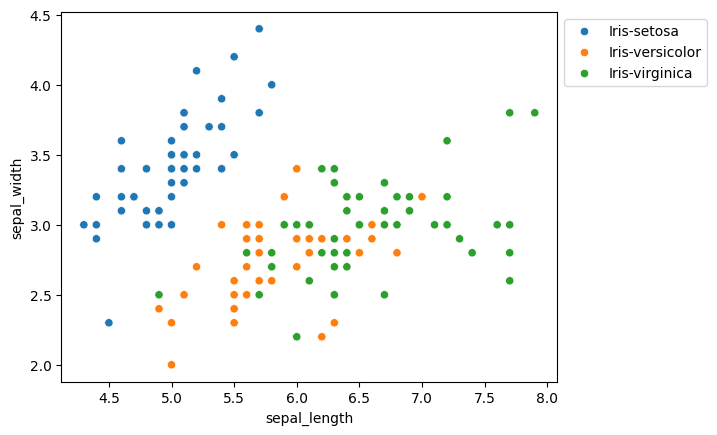

In [9]:
sns.scatterplot(data=data,x='sepal_length',y='sepal_width',hue='species')
plt.legend(bbox_to_anchor=(1,1),loc=2)

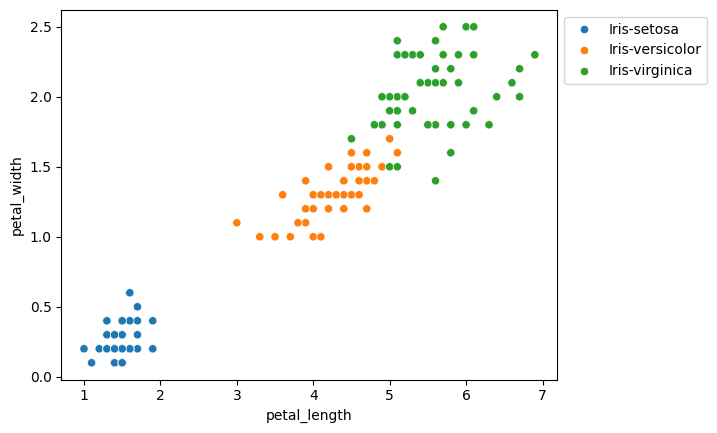

In [10]:
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='species')
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [11]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


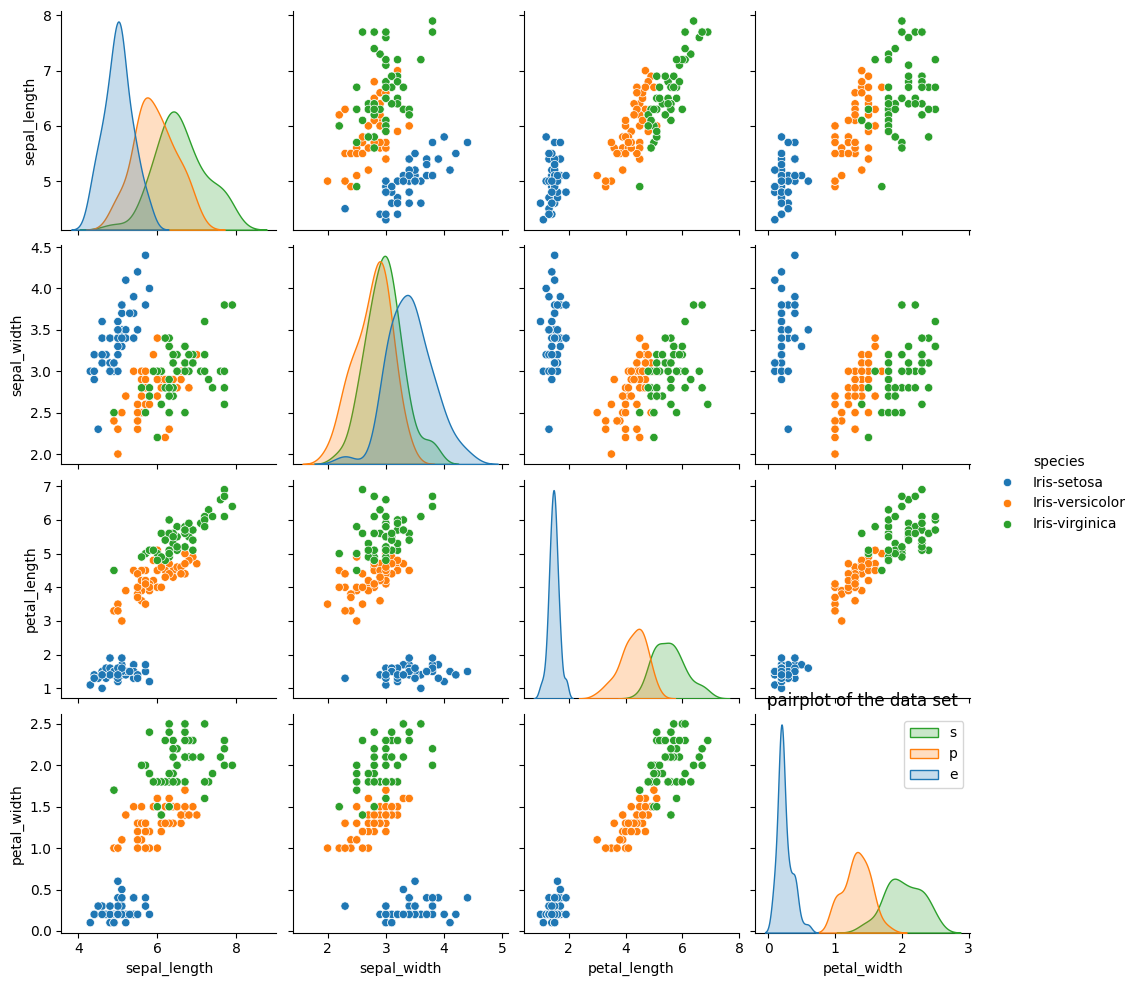

In [13]:
sns.pairplot(data,hue="species",diag_kind='kde')
plt.title("pairplot of the data set")
plt.legend("species")

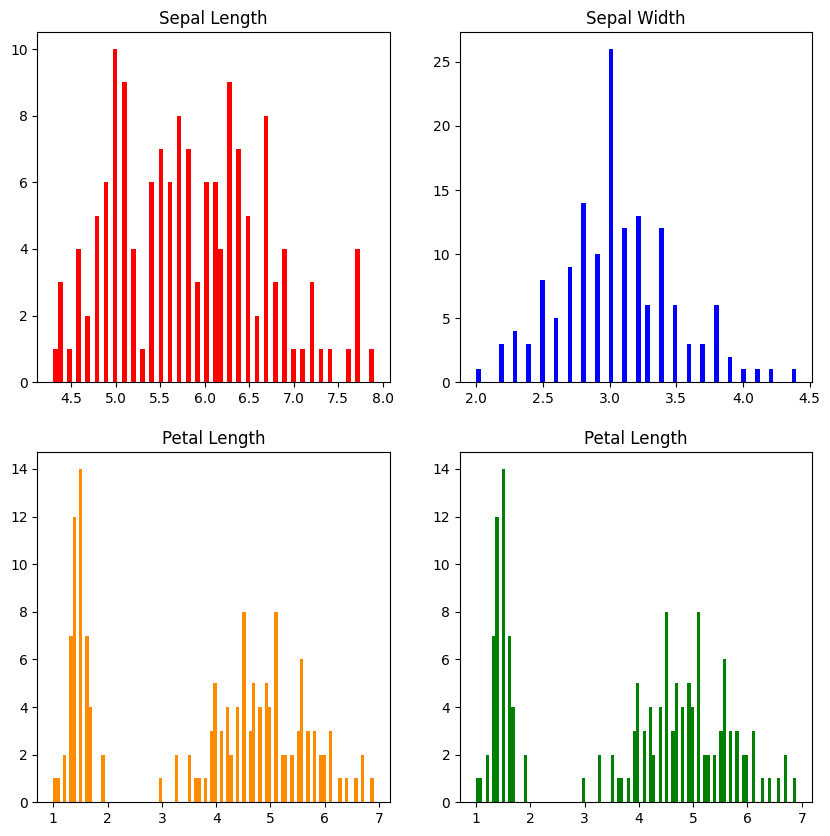

In [14]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].set_title('Sepal Length')
ax[0,0].hist(data['sepal_length'],bins=70,color="red")
ax[0,1].set_title('Sepal Width')
ax[0,1].hist(data['sepal_width'],bins=70,color="blue")  #we draw a histogram 
ax[1,0].set_title('Petal Length')
ax[1,0].hist(data['petal_length'],bins=100,color="darkorange")
ax[1,1].set_title('Petal Length')
ax[1,1].hist(data['petal_length'],bins=100,color="green")
plt.show()

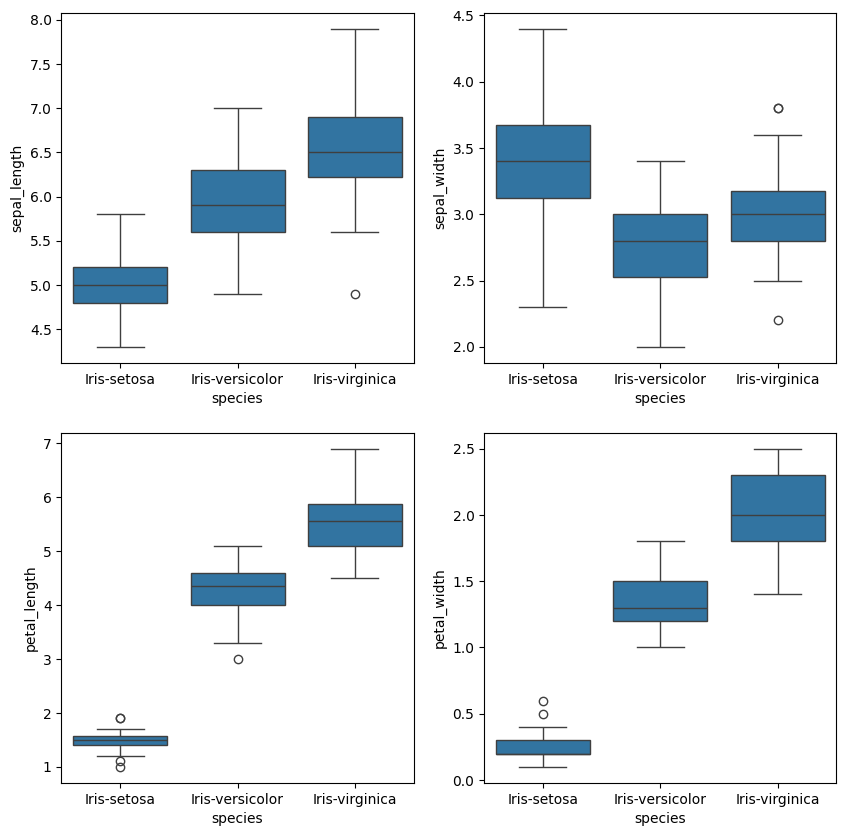

In [15]:
def graph(y):
    sns.boxplot(x=data['species'],y=y,data=data)
plt.figure(figsize=(10,10))

plt.subplot(221)
graph("sepal_length")

plt.subplot(222)
graph("sepal_width")

plt.subplot(223)
graph("petal_length")

plt.subplot(224)
graph("petal_width")

plt.show()
  

<Axes: >

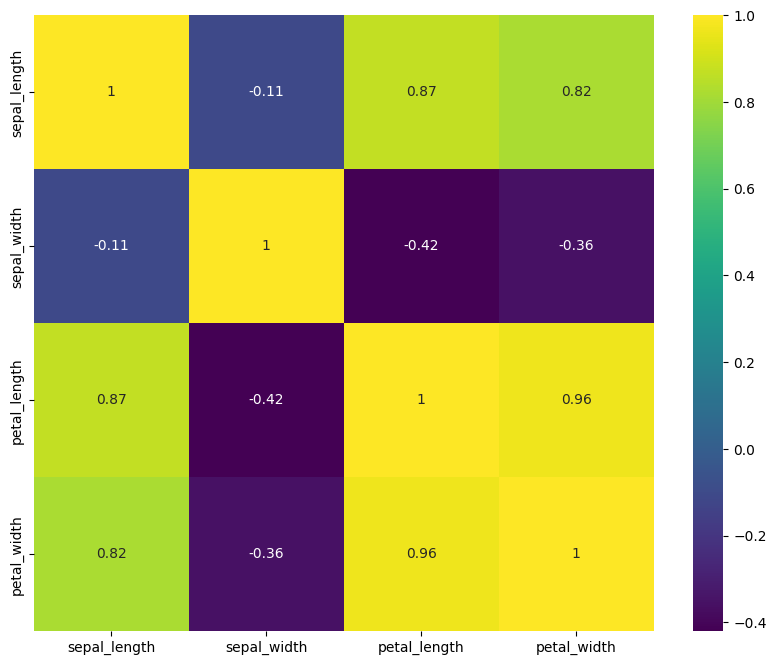

In [16]:
plt.figure(figsize=(10,8))
corr=data[['sepal_length','sepal_width','petal_length','petal_width']].corr()
sns.heatmap(corr,annot=True,cmap='viridis')

In [17]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
from sklearn.cluster import KMeans 

In [19]:

wcss1 = []  # we define  a empty list  i.e with in cluster sum of square 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)  #here we compare within cluster sum of cluster for different no. of cluster.
    kmeans.fit(data[['petal_length','petal_width']])
    wcss1.append(kmeans.inertia_)



In [20]:
wcss1

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 20.3160078034854,
 14.14729386475593,
 11.056639971910453,
 9.297130812538597,
 8.043872171477286,
 6.7733486508914424,
 6.254273015873018]

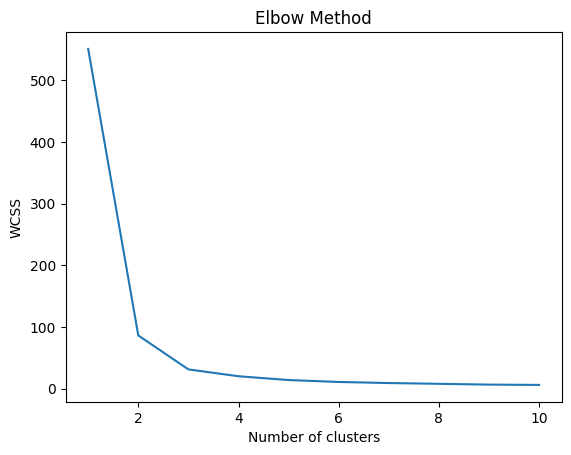

In [21]:
# Plotting the elbow curve
plt.plot(range(1, 11), wcss1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans1=KMeans(n_clusters=4,random_state=2)
y_pred=kmeans1.fit_predict(data[['petal_length','petal_width']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [23]:
data_with_cluster1=data.copy()
data_with_cluster1['cluster1']=y_pred #we create a new columns and we define the cluster in the column with respect to petal
data_with_cluster1

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


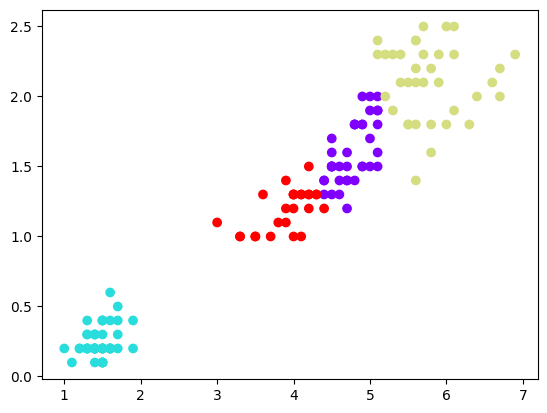

In [24]:
plt.scatter(data_with_cluster1['petal_length'],data_with_cluster1['petal_width'],c=data_with_cluster1["cluster1"],cmap='rainbow')

In [25]:

centroids=kmeans1.cluster_centers_
centroids

array([[4.75789474, 1.59736842],
       [1.464     , 0.244     ],
       [5.78611111, 2.10833333],
       [3.90384615, 1.19230769]])

In [49]:
data_with_cluster1['species']=data_with_cluster1['species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

In [50]:
cm1=confusion_matrix(data_with_cluster1.species,data_with_cluster1.cluster1) #here number of species is 3 and class is 4
cm1

array([[ 0, 50,  0,  0],
       [24,  0,  0, 26],
       [14,  0, 36,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [26]:
wcss2 = [] 

for i in range(1, 11):                        
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data[['sepal_length','sepal_width']])
    wcss2.append(kmeans.inertia_)


In [27]:
wcss2

[130.18093333333337,
 57.99647879763823,
 37.12370212765957,
 28.509571540860737,
 24.28696829264056,
 17.516112899896804,
 14.628929179122286,
 15.34778788773035,
 12.659354830449466,
 12.055797831892464]

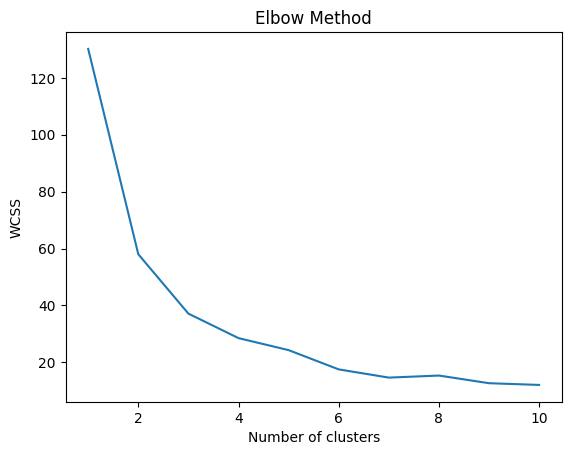

In [28]:
# Plotting the elbow curve
plt.plot(range(1, 11), wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans2=KMeans(n_clusters=5,random_state=2)
y_pred1=kmeans2.fit_predict(data[['sepal_length','sepal_width']])
y_pred1

array([3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 4, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 4, 0, 0, 4, 1, 4, 0, 4,
       0, 0, 0, 2, 2, 0, 0, 4, 4, 2, 0, 2, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4,
       0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2])

In [36]:
data_with_cluster2=data.copy()
data_with_cluster2['cluster2']=y_pred1 #we create a new columns and we define the cluster in the column with respect to sepal
data_with_cluster2

,sepal_length,sepal_width,petal_length,petal_width,species,cluster2
0,5.1,3.5,1.4,0.2,Iris-setosa,3
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,3
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


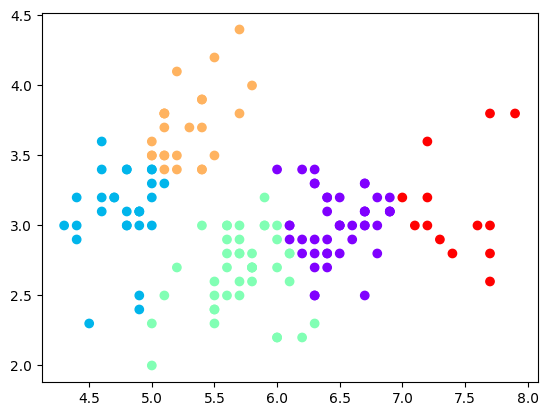

In [38]:
plt.scatter(data_with_cluster2['sepal_length'],data_with_cluster2['sepal_width'],c=data_with_cluster2["cluster2"],cmap='rainbow') #cluster of sepal length and sepal width .

In [39]:
centroids1=kmeans2.cluster_centers_
centroids1

array([[6.48636364, 3.00681818],
       [4.76071429, 3.1       ],
       [5.71463415, 2.66585366],
       [5.28333333, 3.70833333],
       [7.43846154, 3.13076923]])

#confussion matrix

In [40]:
data_with_cluster2['species']=data_with_cluster2['species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

In [41]:
data_with_cluster2

,sepal_length,sepal_width,petal_length,petal_width,species,cluster2
0,5.1,3.5,1.4,0.2,0,3
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,3
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [42]:
from sklearn.metrics import confusion_matrix

In [46]:
cm2=confusion_matrix(data_with_cluster2.species,data_with_cluster2.cluster2) #here number of species is 3 and cluster  is 4
cm2

array([[ 0, 26,  0, 24,  0],
       [16,  1, 32,  0,  1],
       [28,  1,  9,  0, 12],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)